In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('diabetes.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [26]:
df=df.dropna()

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


SyntaxError: invalid syntax (1645341237.py, line 1)

In [7]:
   df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")


Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [10]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)

In [11]:
   for i in df.columns:
       print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")


Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


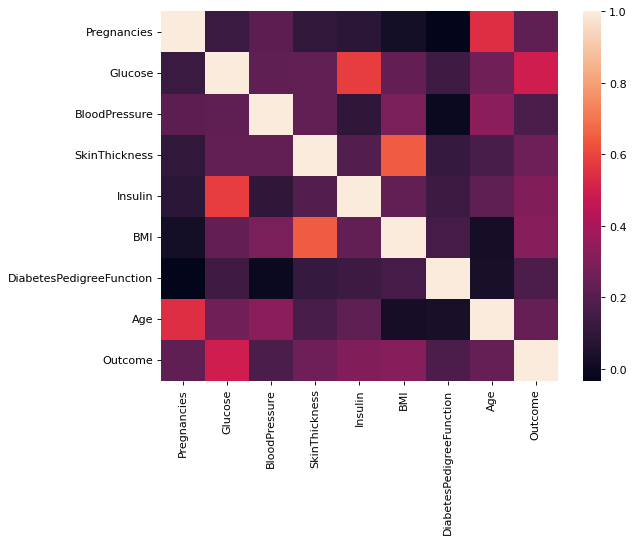

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()


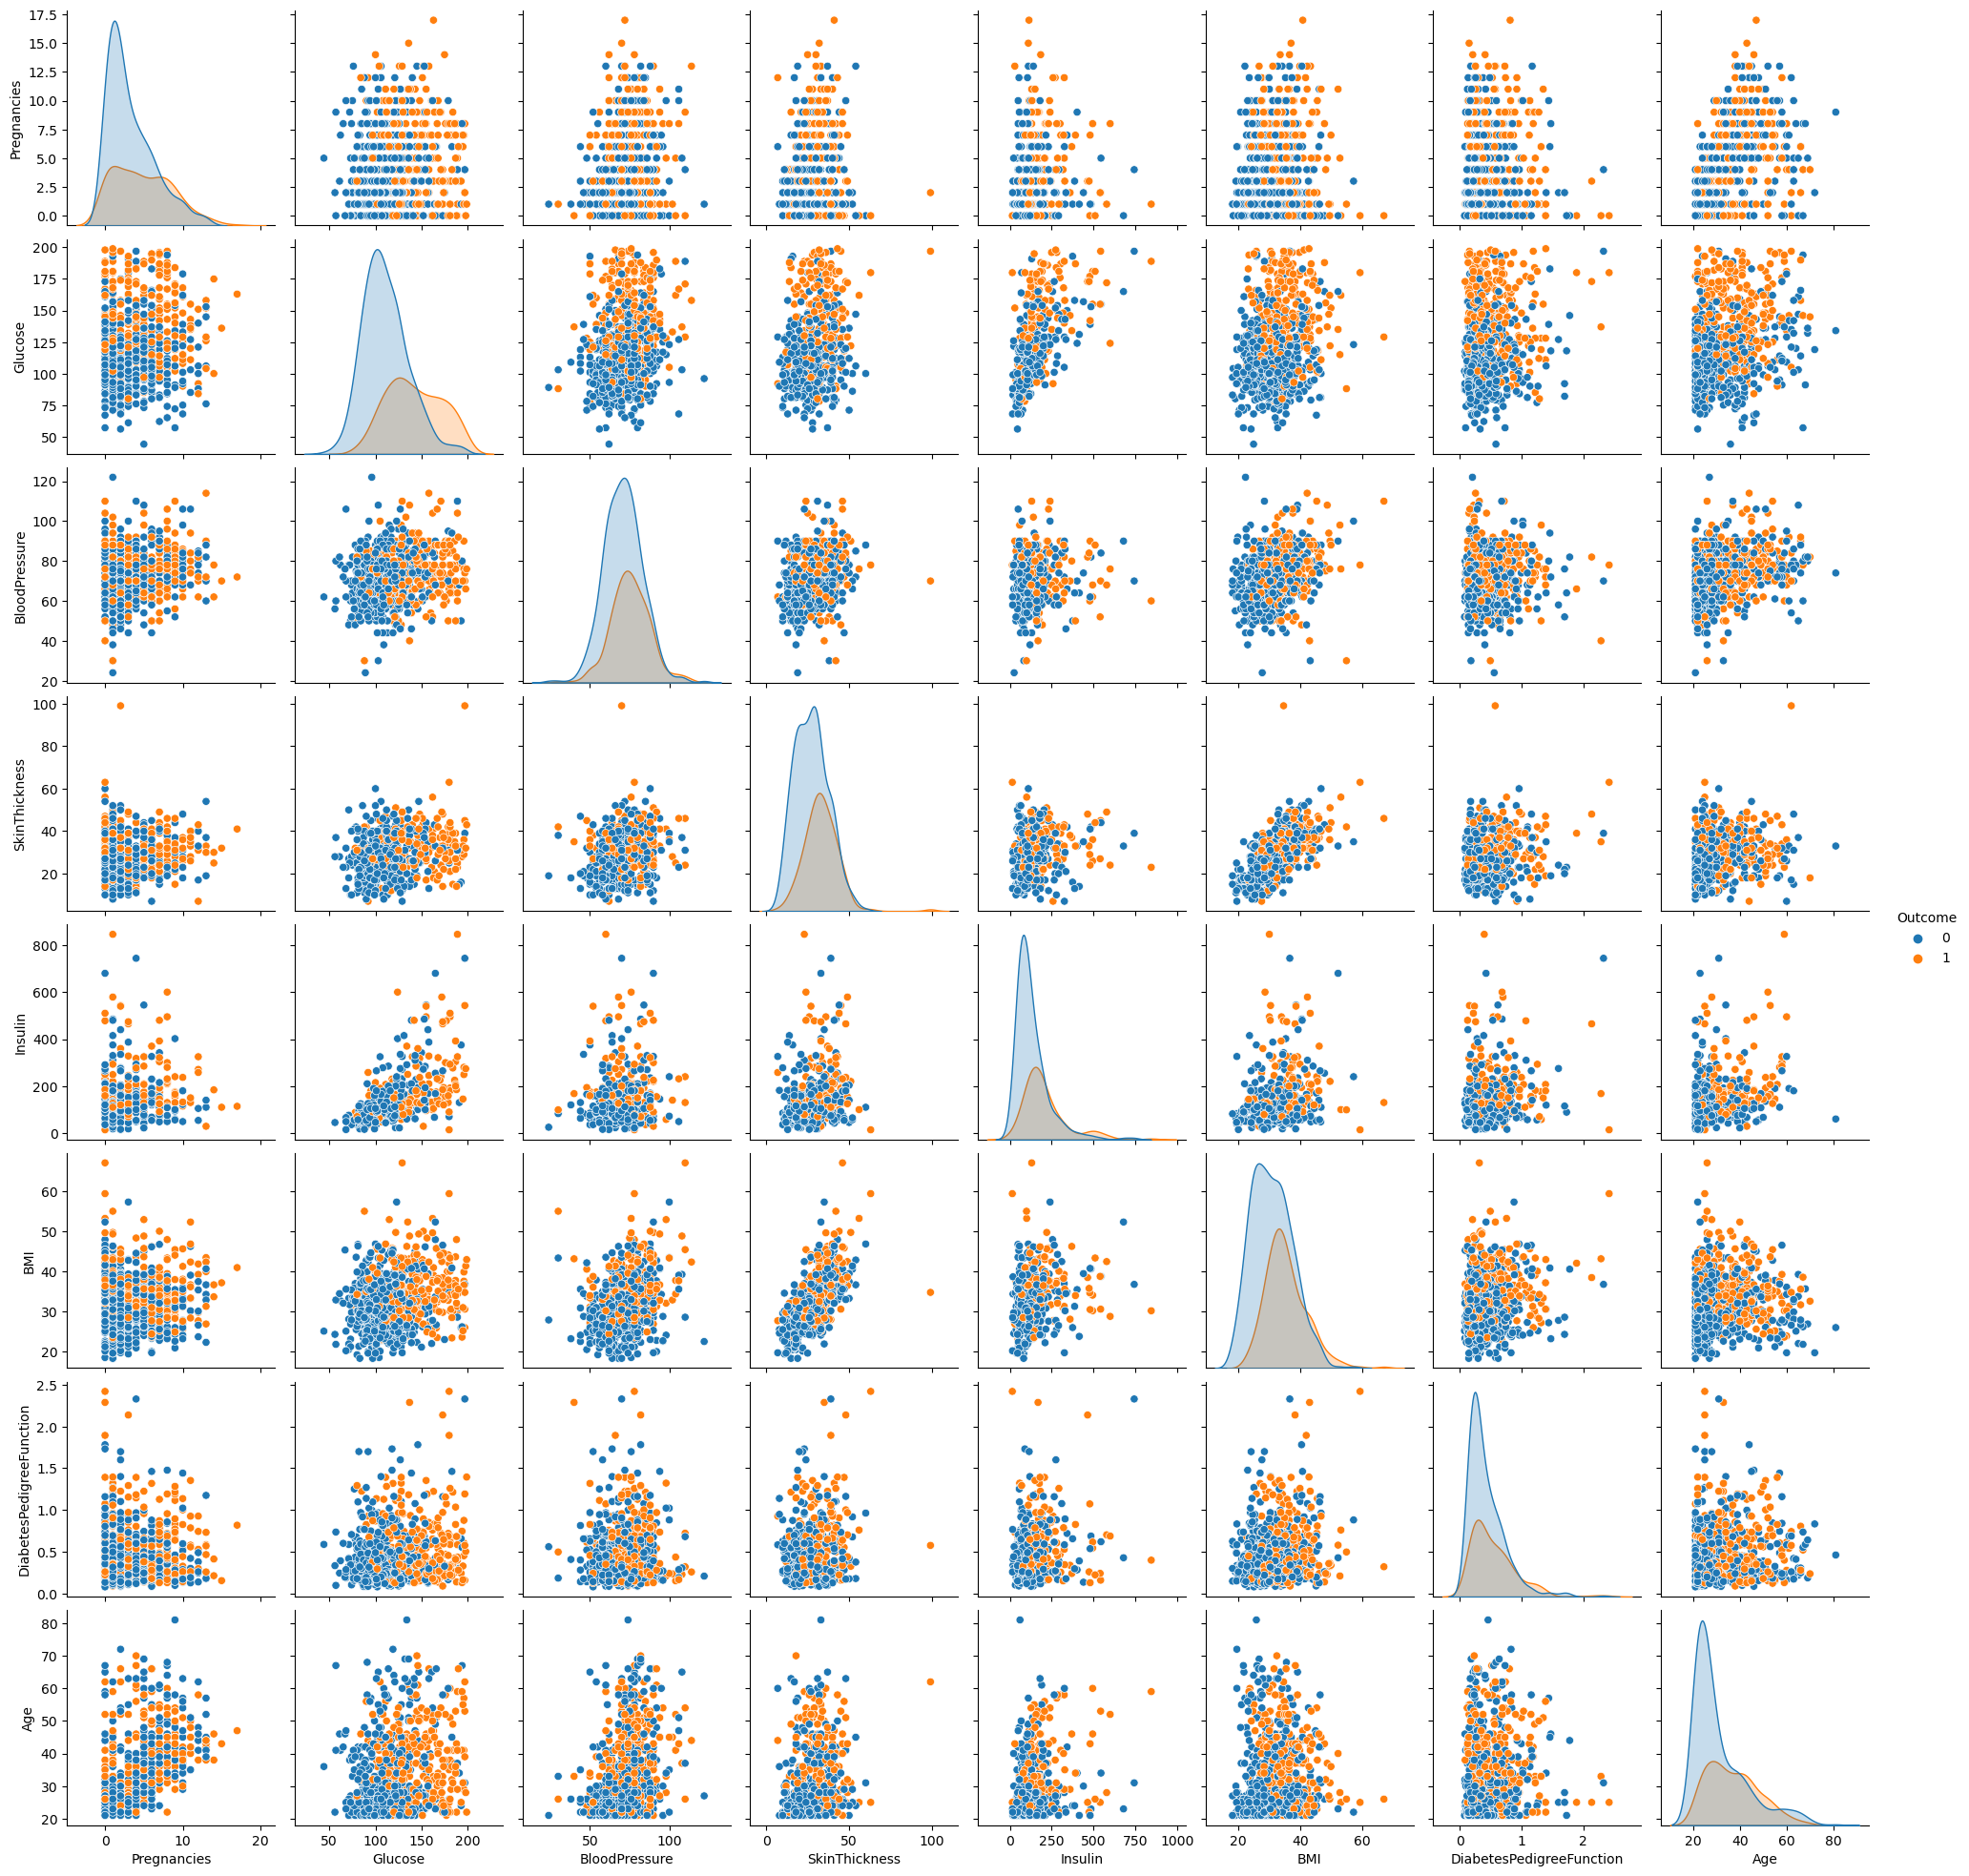

In [14]:
sns.pairplot(df,hue='Outcome')

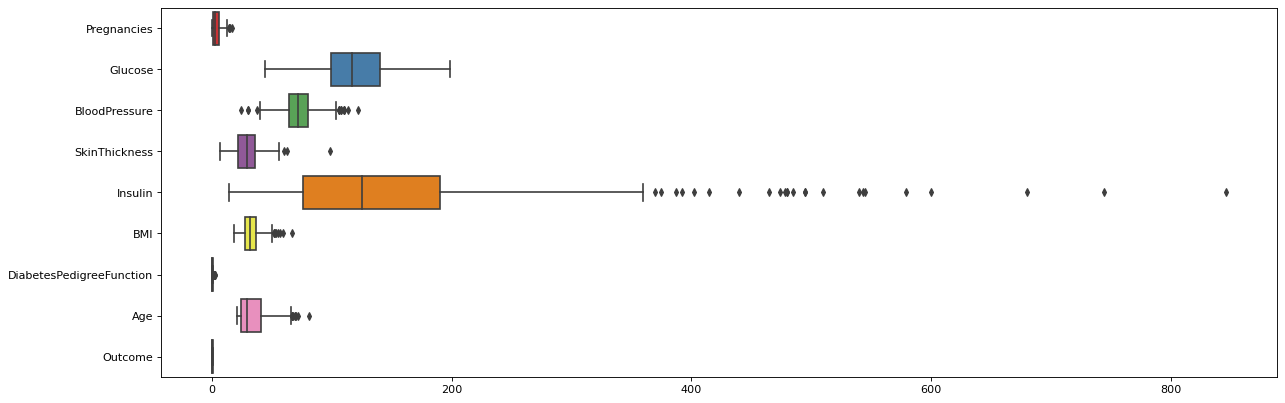

In [15]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h", palette="Set1")
plt.show()


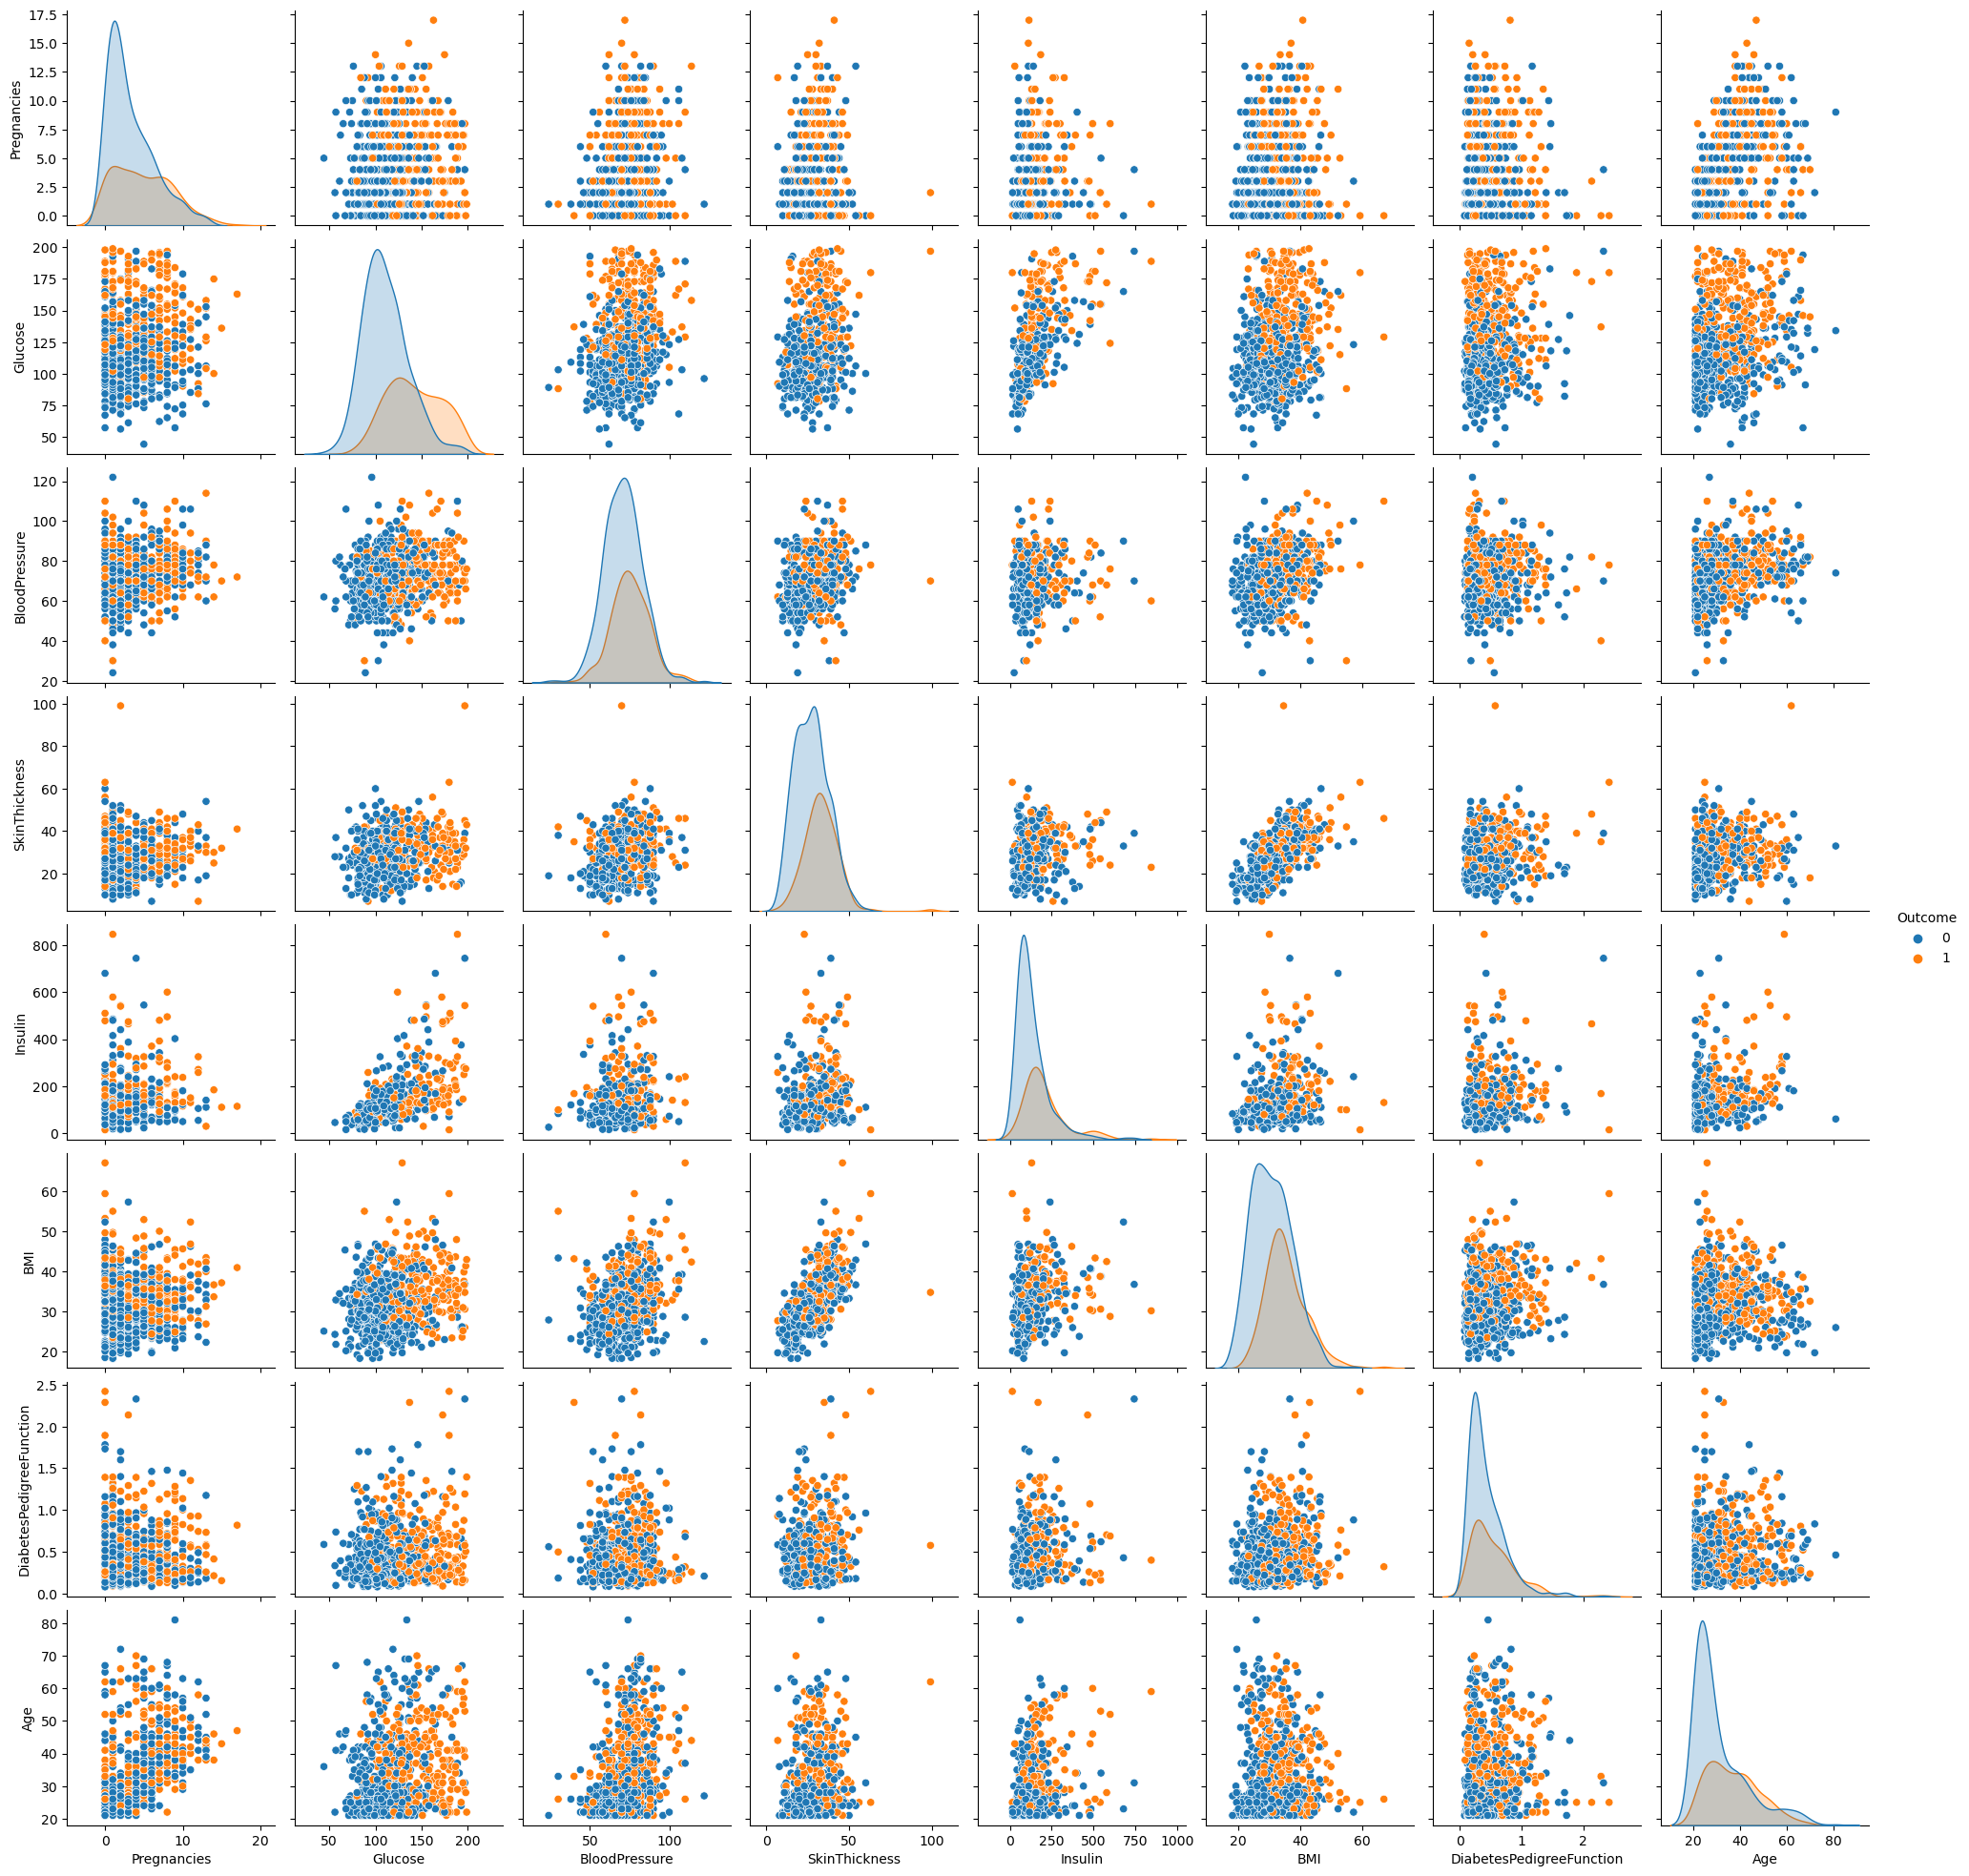

In [16]:
sns.pairplot(df,hue='Outcome')

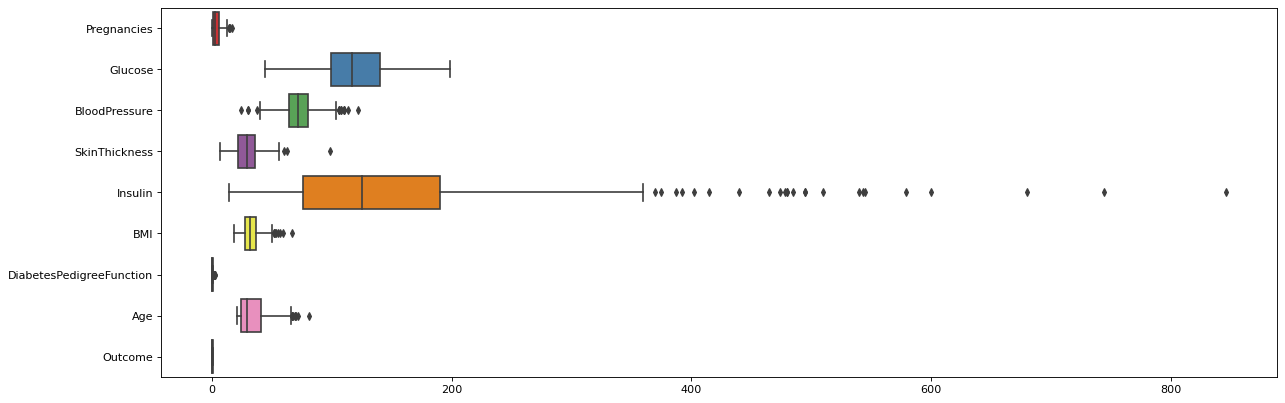

In [17]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h", palette="Set1")
plt.show()


<Axes: xlabel='Outcome', ylabel='count'>

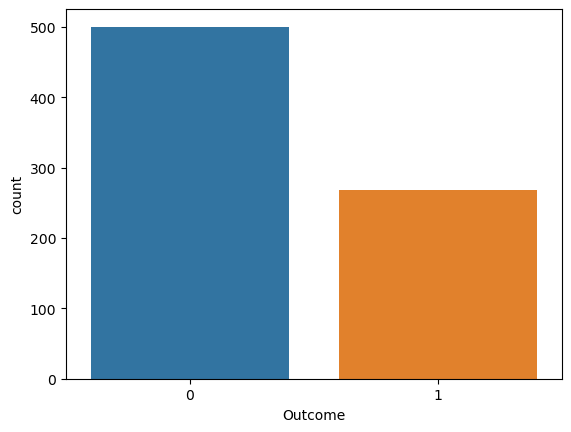

In [18]:
sns.countplot(x="Outcome", data=df)


In [27]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [28]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [30]:
rfc.predict(X_test)
rfc.score(X_test, y_test)


0.7987012987012987

<Axes: >

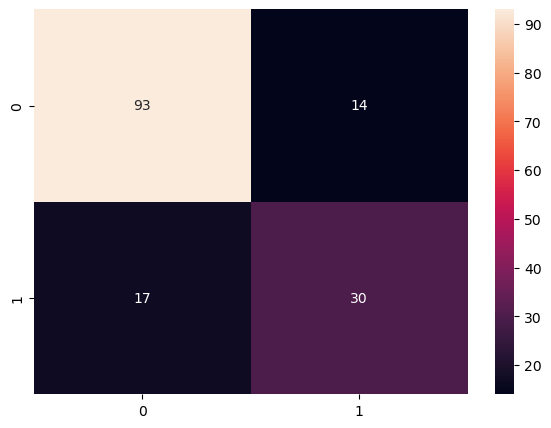

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)


In [33]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    Diabetes       0.85      0.87      0.86       107
      Normal       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [34]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


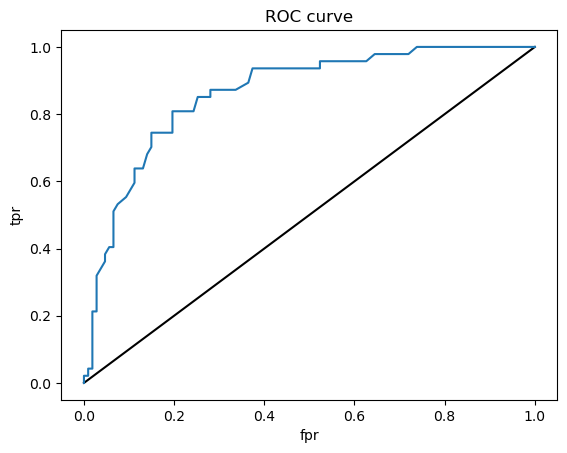

In [35]:
   plt.plot([0,1],[0,1],'k-')
   plt.plot(fpr,tpr, label='Knn')
   plt.xlabel('fpr')
   plt.ylabel('tpr')
   plt.title('ROC curve')
   plt.show()


In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)


0.8629946311393916

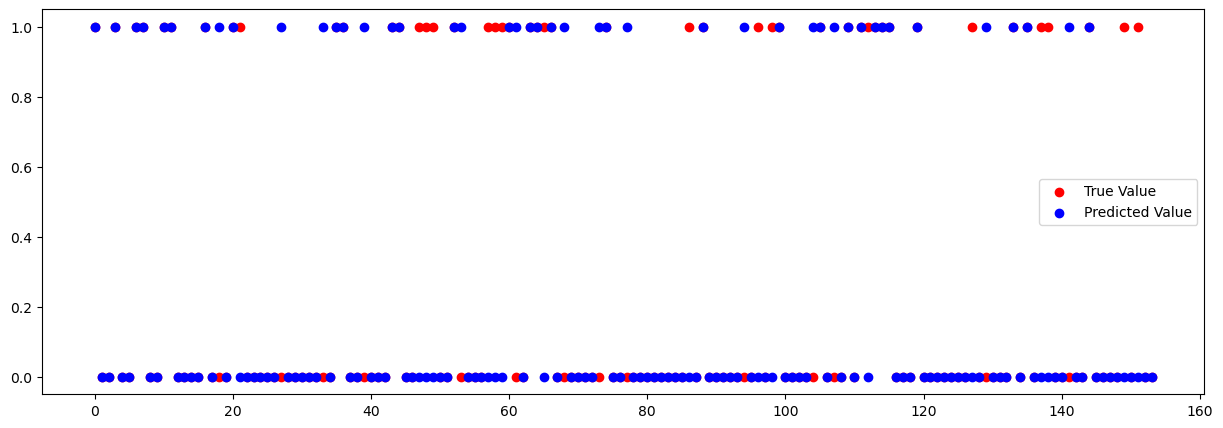

In [37]:
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,y_pred,c="blue", label = 'Predicted Value')
plt.legend()
